In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
_dict = {}

In [3]:
url = 'https://www.worldometers.info/coronavirus/'
today = str(date.today())

In [4]:
page = requests.get(url)
soup = BeautifulSoup(page.content)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 208,172 Cases and 8,272 Deaths from COVID-19 Virus Outbreak - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, and death toll by country due to the COVID 19 coronavirus from Wuhan, China. Coronavirus counter with new cases, historical data, and info. Daily charts, graphs, news and updates" name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-ico
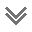

In [5]:
print(soup.prettify())

In [6]:
for _tr_list in soup.tbody.find_all('tr'):
    _td_list = _tr_list.find_all('td')
    for i, _td in enumerate(_td_list):        
        # Recuperar el nombre del pais cuando es un enlace
        if i%9 == 0:
            _a = _td.find('a')
                # Recuperar el nombre del pais cuando es un enlace
            if _a:
                country_name = _a['href'].split('/')[1]
            else:
                _span = _td.find('span')
                if _span:
                    # Recuperar el nombre del cuando ocupa dos filas
                    country_name = _span.contents[0]
                else:
                     # Recuperar el nombre del pais cuando no es un enlace
                    country_name = _td.contents[0]
            if country_name:
                country_name = country_name.strip()
                if country_name not in list(_dict.keys()):
                    _dict[country_name] = {} 
                _dict[country_name][today] = []
        # Recuperar los datos del pais
        else:
            if len(_td.contents) > 0:
                data = _td.contents[0].replace('+','').replace(',','').strip()
                if data:
                    _dict[country_name][today].append(float(data))
                else:
                    _dict[country_name][today].append(0)
            else:
                _dict[country_name][today].append(0)

https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary

In [7]:
df = pd.concat({k: pd.DataFrame(v).T for k, v in _dict.items()}, axis=0)
df.columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_recovered', 'active_cases', 'servious_critical', 'total_cases_1M_pop']
display(df.head())

total_cases  new_cases  total_deaths  \
Afghanistan         2020-03-18         22.0        0.0           0.0   
Albania             2020-03-18         59.0        4.0           2.0   
Algeria             2020-03-18         72.0       11.0           6.0   
Andorra             2020-03-18         39.0        0.0           0.0   
Antigua and Barbuda 2020-03-18          1.0        0.0           0.0   

                                new_deaths  total_recovered  active_cases  \
Afghanistan         2020-03-18         0.0              1.0          21.0   
Albania             2020-03-18         1.0              0.0          57.0   
Algeria             2020-03-18         1.0             10.0          56.0   
Andorra             2020-03-18         0.0              1.0          38.0   
Antigua and Barbuda 2020-03-18         0.0              0.0           1.0   

                                servious_critical  total_cases_1M_pop  
Afghanistan         2020-03-18                0.0                 0.6  
Albania             2020-03-18                2.0                21.0  
Algeria             2020-03-18                0.0                 2.0  
Andorra             2020-03-18                0.0               505.0  
Antigua and Barbuda 2020-03-18                0.0                10.0

In [8]:
df.loc['spain'].loc['2020-03-18']['total_cases']

13910.0

In [9]:
df.to_csv('out.csv', index=True) 